In [118]:
from numpy import array, min, argmin, linspace
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import pickle

# 1. Жадный алгоритм размещения тем

In [28]:
data = []
with open("../datasets/topics_distances.dump", "rb") as file:
    data = pickle.load(file)
    
data = array(data)
data.shape

(19, 19)

In [29]:
def greedy_solution(data, start_pos):
    answer = [start_pos]
    cost = 0
    prev_pos = start_pos
    visited = np.zeros(19)
    for i in range(18):
        visited[prev_pos] = 1
        next_pos = argmin([np.inf if x == 1 else v for (x, v) in zip(visited, data[prev_pos])])
        cost += data[prev_pos][next_pos]
        answer.append(next_pos)
        prev_pos = next_pos
    return answer, cost

In [30]:
from operator import itemgetter
solution = sorted([greedy_solution(data, i) for i in range(19)], key=itemgetter(1))[0][0]
solution

[5, 13, 11, 2, 8, 4, 0, 3, 16, 10, 1, 17, 18, 9, 14, 12, 7, 6, 15]

# 2. ????

# 3. PROFIT!!!

## Docs

In [31]:
model = []
with open("../server/hartm.mdl", "rb") as file:
    model = pickle.load(file)

In [63]:
TOP_N_WORDS = 10
phi0 = model["phi_0"]
phi0_topic_columns = list(filter(lambda t: t.startswith("topic_"), phi0.columns))
phi0 = phi0[phi0_topic_columns]
theta = model["theta"]
model.keys()

dict_keys(['phi_0', 'psi_1', 'phi_1', 'theta'])

In [210]:
WORDS_TO_CLASSIFICATION_DICT=1000
top_tags = zip(theta0.index, phi0.index[phi0.values.argsort(axis=0)[-WORDS_TO_CLASSIFICATION_DICT:][::-1].T])
for topic, words in top_tags:
    print(topic, ":", words[:5])

level_0_topic_0 : ['россия' 'история' 'история_россии' 'философия' 'политическая_философия']
level_0_topic_1 : ['биология' 'эволюция' 'антропология' 'человек' 'палеонтология']
level_0_topic_2 : ['экономика' 'сша' 'квантовые_технологии' 'квантовый_компьютер'
 'финансовый_кризис']
level_0_topic_3 : ['культура' 'литература' 'массовая_культура' 'культурология' 'философия']
level_0_topic_4 : ['история' 'ссср' 'христианство' 'политика' 'религия']
level_0_topic_5 : ['астрономия' 'астрофизика' 'космос' 'звезды' 'вселенная']
level_0_topic_6 : ['язык' 'лингвистика' 'филология' 'русский_язык' 'право']
level_0_topic_7 : ['социология' 'общество' 'социология_повседневности' 'город'
 'дюркгейм_эмиль']
level_0_topic_8 : ['общество' 'государство' 'россия' 'политология' 'китай']
level_0_topic_9 : ['психология' 'технологии' 'искусственный_интеллект' 'интернет'
 'когнитивная_психология']
level_0_topic_10 : ['медицина' 'биология' 'генетика' 'клетка' 'ген']
level_0_topic_11 : ['физика' 'квантовая_физика' 'ф

In [201]:
tech_topics = theta0.index[[5,11,13,15]]
hum_topics = theta0.index[[0,3,4,6,8,12]]
natural_topics = theta0.index[[1,10,16,17,18]]

In [195]:
import re
theta0 = theta.loc[list(filter(lambda t: re.match("level_0_topic_*", t), theta.index))]

theta_tech = theta0.loc[tech_topics, :]
theta_hum = theta0.loc[hum_topics, :]
theta_natural = theta0.loc[natural_topics, :]

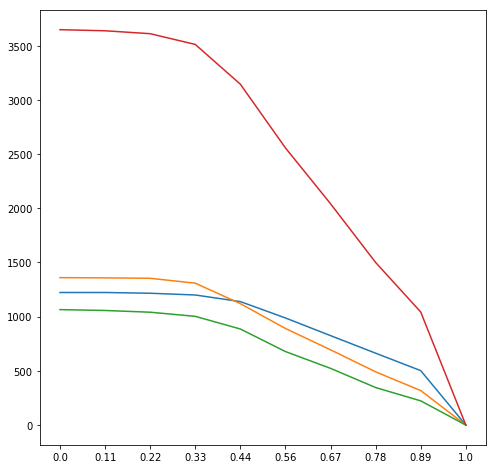

In [197]:
def docs_num_by_threshold(thresold):
    nearest_topic_for_doc = theta0[theta0 > thresold].idxmax().dropna()
    tech_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in tech_topics]
    hum_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in hum_topics]
    natural_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in natural_topics]
    return len(tech_docs), len(hym_docs), len(natural_docs)

plt.figure(figsize=(8, 8))
for pl in array([docs_num_by_threshold(tr) for tr in linspace(0, 1, 10)]).T:
    plt.plot(pl)
    
plt.plot(t[0]+t[1]+t[2])
plt.xticks(range(10), linspace(0, 1, 10).round(2))
plt.show()

In [198]:
def docs_by_threshold(thresold):
    nearest_topic_for_doc = theta0[theta0 > thresold].idxmax().dropna()
    tech_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in tech_topics]
    hum_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in hum_topics]
    natural_docs = [doc for doc in nearest_topic_for_doc.index if nearest_topic_for_doc[doc] in natural_topics]
    return tech_docs, hym_docs, natural_docs

tech_docs, hum_docs, natural_docs = docs_by_threshold(0.65)

## WORDS

In [221]:
tech_words = []
hum_words = []
natural_words = []

WORDS_FROM_TOPIC=300

top_tags = zip(theta0.index, phi0.index[phi0.values.argsort(axis=0)[-WORDS_FROM_TOPIC:][::-1].T])
for topic, words in top_tags:
    if topic in tech_topics:
        tech_words.extend(words)
    elif topic in hum_topics:
        hum_words.extend(words)
    elif topic in natural_topics:
        natural_words.extend(words)
    else:
        pass

tech_words = set(tech_words)
hum_words = set(hum_words)
natural_words = set(natural_words)

885